In [15]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
# to do 
# return 2 csv file 
# games.csv game.csv 

In [3]:
with open('matches_list.json','r') as file:
    matches_list = json.loads(file.read())

#### Game CSV

In [4]:
columns_list = list(matches_list[0]['info'].keys())
columns_list.remove('participants')
columns_list.remove('teams')
# columns_list

In [5]:
# game info
games_df = pd.DataFrame(columns=columns_list)
# game_df

In [6]:
for match in matches_list:
    games_df = games_df.append(match.get('info'),ignore_index=True,verify_integrity=True)

In [7]:
# set tyes automaticaly
games_df = games_df.convert_dtypes()

In [8]:
games_df.describe()

,gameCreation,gameDuration,gameEndTimestamp,gameId,gameStartTimestamp,mapId,queueId
count,2.000000e+01,20.000000,2.000000e+01,2.000000e+01,2.000000e+01,20.000000,20.000000
mean,1.650406e+12,1902.350000,1.650408e+12,5.832598e+09,1.650406e+12,11.050000,421.500000
std,1.754490e+08,370.912995,1.754132e+08,3.057975e+06,1.754531e+08,0.223607,6.708204
min,1.650170e+12,1054.000000,1.650173e+12,5.828425e+09,1.650170e+12,11.000000,420.000000
25%,1.650237e+12,1606.250000,1.650239e+12,5.829631e+09,1.650237e+12,11.000000,420.000000
50%,1.650411e+12,1905.500000,1.650413e+12,5.832834e+09,1.650411e+12,11.000000,420.000000
75%,1.650586e+12,2136.500000,1.650588e+12,5.835878e+09,1.650586e+12,11.000000,420.000000
max,1.650648e+12,2566.000000,1.650651e+12,5.836646e+09,1.650648e+12,12.000000,450.000000


In [9]:
def get_win(row):
    participants = row['participants']
    for participant in participants:
        if participant['summonerName'] == 'taoufique':
            return 1 if participant['win'] else 0
def get_goldSpent(row):
    participants = row['participants']
    for participant in participants:
        if participant['summonerName'] == 'taoufique':
            return participant['goldSpent'] 
# games_df.participants[0][4]['player_name']
games_df['win'] = games_df.apply(get_win,axis=1)
games_df['goldSpent'] = games_df.apply(get_goldSpent,axis=1)
games_df = games_df.convert_dtypes()

In [10]:
games_df.describe()

,gameCreation,gameDuration,gameEndTimestamp,gameId,gameStartTimestamp,mapId,queueId,win,goldSpent
count,2.000000e+01,20.000000,2.000000e+01,2.000000e+01,2.000000e+01,20.000000,20.000000,20.000000,20.000000
mean,1.650406e+12,1902.350000,1.650408e+12,5.832598e+09,1.650406e+12,11.050000,421.500000,0.500000,13107.250000
std,1.754490e+08,370.912995,1.754132e+08,3.057975e+06,1.754531e+08,0.223607,6.708204,0.512989,3938.655419
min,1.650170e+12,1054.000000,1.650173e+12,5.828425e+09,1.650170e+12,11.000000,420.000000,0.000000,7675.000000
25%,1.650237e+12,1606.250000,1.650239e+12,5.829631e+09,1.650237e+12,11.000000,420.000000,0.000000,10300.000000
50%,1.650411e+12,1905.500000,1.650413e+12,5.832834e+09,1.650411e+12,11.000000,420.000000,0.500000,12432.500000
75%,1.650586e+12,2136.500000,1.650588e+12,5.835878e+09,1.650586e+12,11.000000,420.000000,1.000000,15725.000000
max,1.650648e+12,2566.000000,1.650651e+12,5.836646e+09,1.650648e+12,12.000000,450.000000,1.000000,23770.000000


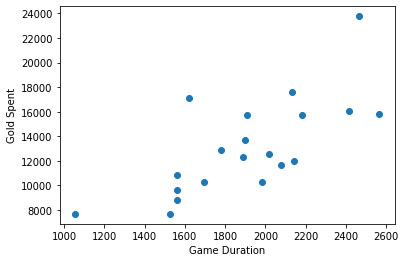

In [11]:
# games_df.info()
plt.scatter(games_df.gameDuration,games_df.goldSpent)
plt.ylabel('Gold Spent')
plt.xlabel('Game Duration')    
plt.show()

In [13]:
games_df.head(1)

,gameCreation,gameDuration,gameEndTimestamp,gameId,gameMode,gameName,gameStartTimestamp,gameType,gameVersion,mapId,platformId,queueId,tournamentCode,participants,teams,win,goldSpent
0,1650648417000,2134,1650650589941,5836646046,CLASSIC,teambuilder-match-5836646046,1650648455539,MATCHED_GAME,12.7.433.4138,11,EUW1,420,,"[{'assists': 3, 'baronKills': 0, 'bountyLevel'...","[{'bans': [{'championId': 119, 'pickTurn': 1},...",1,17625


In [32]:
participants_cols = list(matches_list[0]['info']['participants'][0].keys())

In [49]:
if not os.path.exists('./games'):
    os.mkdir('games')
for index,_game in games_df.iterrows():
    game_id = _game.gameId
    game_participants = _game.participants
    game_df = pd.DataFrame(columns=participants_cols)
    # print(game_participants)
    for _participant in game_participants:
        game_df = game_df.append(_participant,ignore_index=True)
    game_df.to_csv(f'games/{game_id}.csv',index_label=False)
    print(f"{game_id} Completed")

    

5836646046 Completed
5836559976 Completed
5836566662 Completed
5835886782 Completed
5835875207 Completed
5835942073 Completed
5835619884 Completed
5832944860 Completed
5832923391 Completed
5832911123 Completed
5832756558 Completed
5832683035 Completed
5829755396 Completed
5829712579 Completed
5829638259 Completed
5829565592 Completed
5829610538 Completed
5829475432 Completed
5828455394 Completed
5828425082 Completed
